In [ ]:
!ls /content/drive/MyDrive/collab


customer_booking.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sqlalchemy import create_engine
import psycopg2



file_path = "/content/drive/MyDrive/collab/customer_booking.csv"
with open(file_path, "rb") as f:
    result = chardet.detect(f.read(50000))
print(result)

dataset = pd.read_csv(file_path, encoding='Windows-1252')
print("Розмірність датасету:", dataset.shape)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Розмірність датасету: (50000, 14)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [ ]:
duplicates = dataset.duplicated()
print("Кількість дублікатів у датасеті:", duplicates.sum())

dataset = dataset.drop_duplicates()

print("Розмірність датасету після видалення дублікатів:", dataset.shape)


Кількість дублікатів у датасеті: 719
Розмірність датасету після видалення дублікатів: (49281, 14)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [ ]:
dataset.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
dataset.isna().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
dataset.describe(include="all")


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281,49281,49281.000000,49281.000000,49281.000000,49281,49281,49281,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,43917,48779,NaN,NaN,NaN,7988,2620,17691,NaN,NaN,NaN,NaN,NaN
mean,1.590187,NaN,NaN,84.723281,23.053976,9.070676,NaN,NaN,NaN,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,NaN,NaN,90.410229,33.832149,5.413099,NaN,NaN,NaN,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [ ]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    unique_count = dataset[column].nunique()
    print(f"\n🔹 {column} ({unique_count} унікальних значень):")

    print(unique_values)



🔹 num_passengers (9 унікальних значень):
[2 1 3 4 6 5 7 9 8]

🔹 sales_channel (2 унікальних значень):
['Internet' 'Mobile']

🔹 trip_type (3 унікальних значень):
['RoundTrip' 'CircleTrip' 'OneWay']

🔹 purchase_lead (470 унікальних значень):
[262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135 222 

In [ ]:
df = dataset
print("\nУнікальні значення flight_hour:", df['flight_hour'].unique())
print("Мін/Макс num_passengers:", df['num_passengers'].min(), "-", df['num_passengers'].max())
print("Мін/Макс purchase_lead:", df['purchase_lead'].min(), "-", df['purchase_lead'].max())
print("Мін/Макс length_of_stay:", df['length_of_stay'].min(), "-", df['length_of_stay'].max())
print("Мін/Макс flight_duration:", df['flight_duration'].min(), "-", df['flight_duration'].max())



Унікальні значення flight_hour: [ 7  3 17  4 15 20  6 14 12  2 19 10  8 23  9 13 11  0  1  5 16 18 22 21]
Мін/Макс num_passengers: 1 - 9
Мін/Макс purchase_lead: 0 - 867
Мін/Макс length_of_stay: 0 - 778
Мін/Макс flight_duration: 4.67 - 9.5


In [ ]:
print("\nТоп-10 маршрутів:")
print(df['route'].value_counts().head(10))

print("\nТоп-10 країн походження:")
print(df['booking_origin'].value_counts().head(10))



Топ-10 маршрутів:
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
ICNSYD     683
DMKPER     677
DPSICN     658
DMKOOL     652
MELTPE     637
Name: count, dtype: int64

Топ-10 країн походження:
booking_origin
Australia      17691
Malaysia        7055
South Korea     4502
Japan           3819
China           3284
Indonesia       2317
Taiwan          2042
Thailand        1993
India           1258
New Zealand     1060
Name: count, dtype: int64


In [ ]:
dataset.duplicated().sum()

dataset[dataset.duplicated()]


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete


In [ ]:
dataset.T.duplicated().sum()

dupl_cols = dataset.columns[dataset.T.duplicated()]
print(dupl_cols)


Index([], dtype='object')


/tmp/ipython-input-636566548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="booking_complete", data=dataset, palette="Set2")


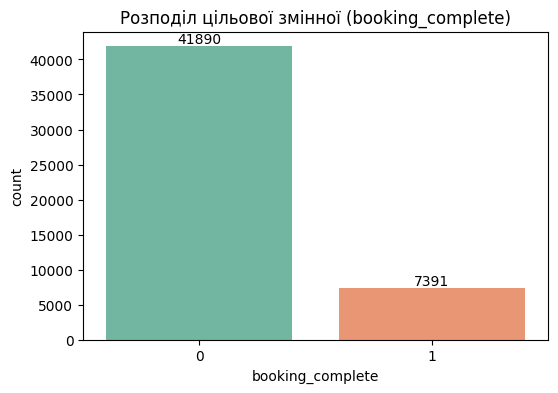

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="booking_complete", data=dataset, palette="Set2")
plt.title("Розподіл цільової змінної (booking_complete)")

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(),
            int(i.get_height()),
            ha='center', va='bottom')

plt.show()



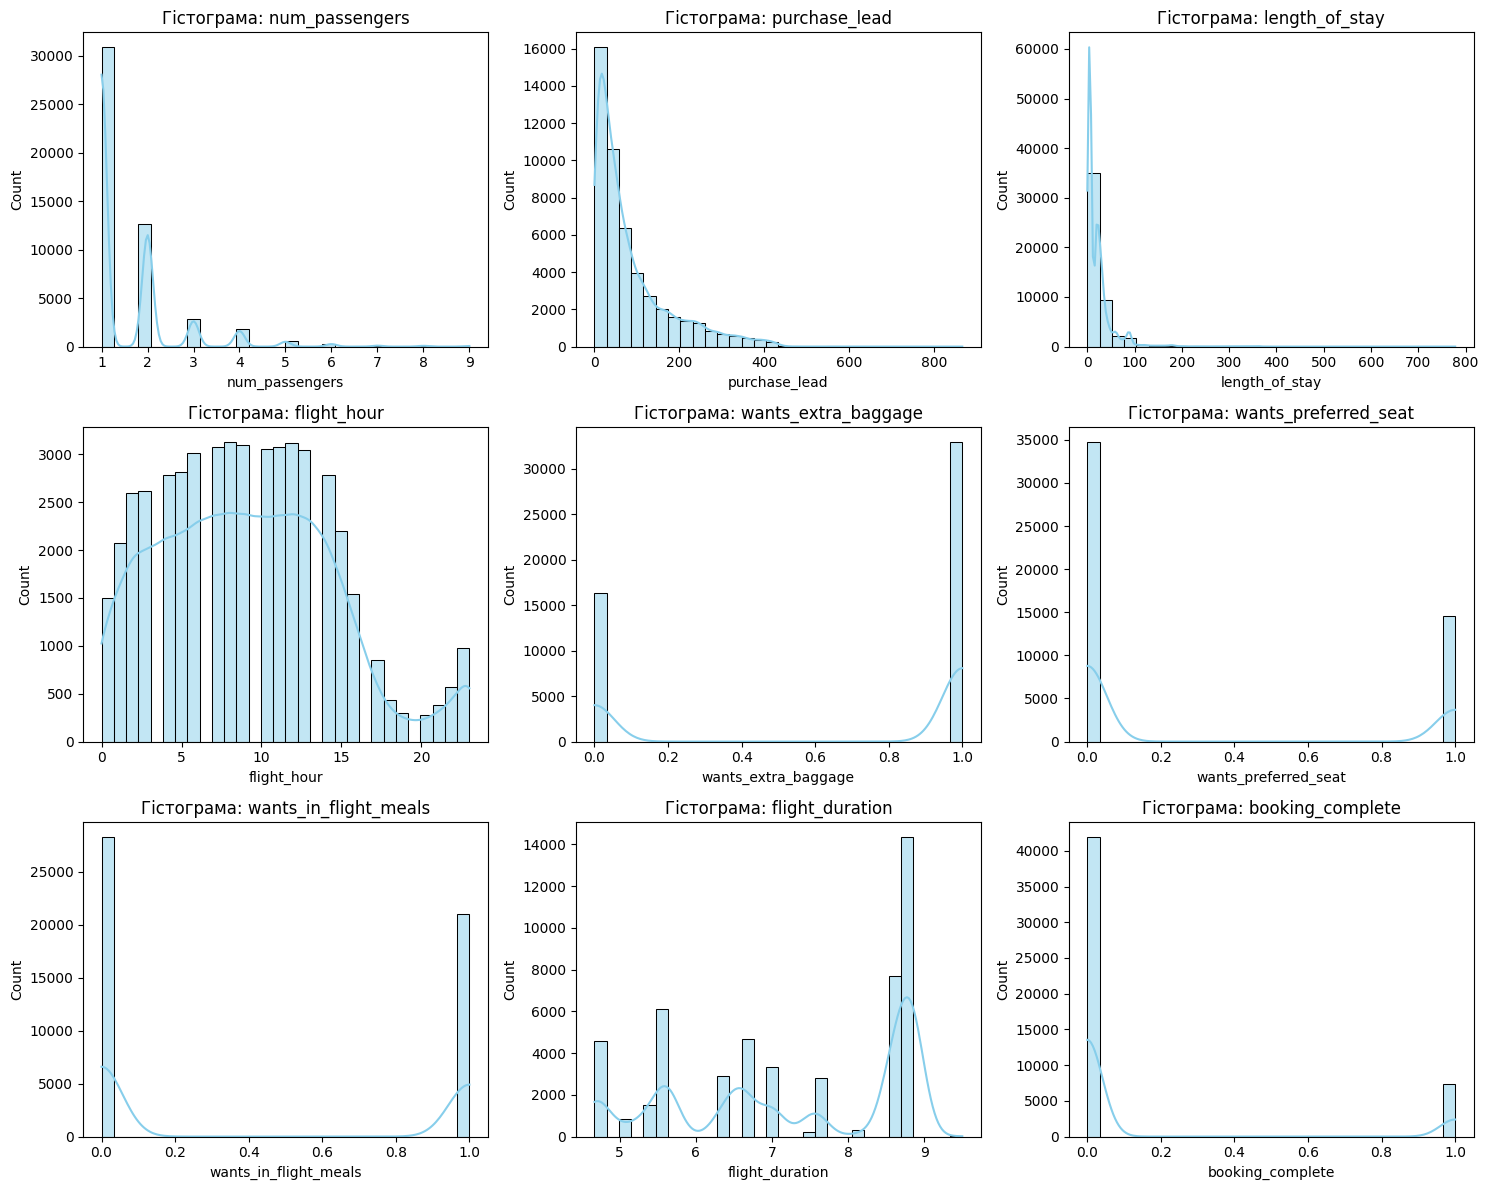

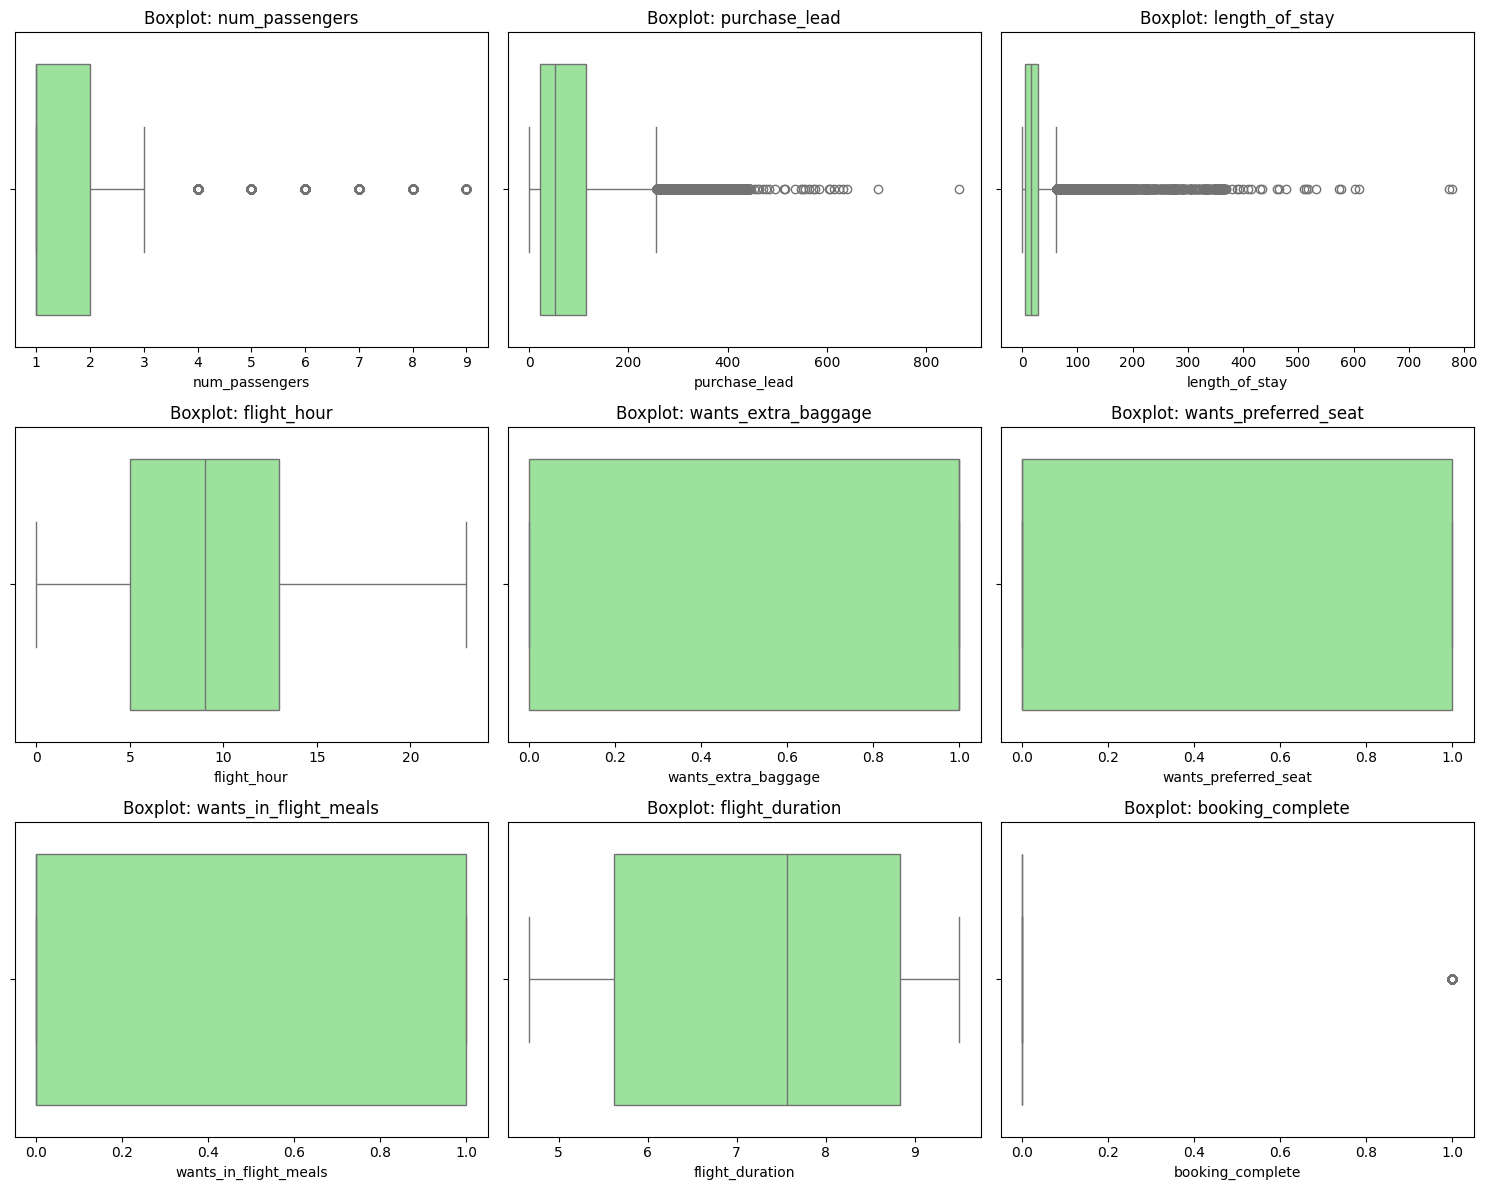

In [ ]:


num_cols = ["num_passengers", "purchase_lead", "length_of_stay",
            "flight_hour", "wants_extra_baggage", "wants_preferred_seat",
            "wants_in_flight_meals", "flight_duration", "booking_complete"]

plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Гістограма: {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)

    .
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


/tmp/ipython-input-411546558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=order)


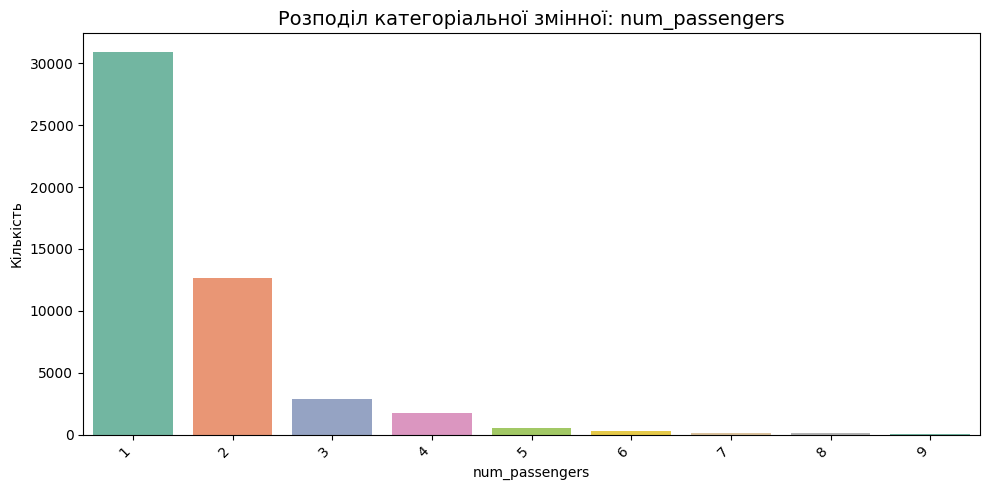

/tmp/ipython-input-411546558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=order)


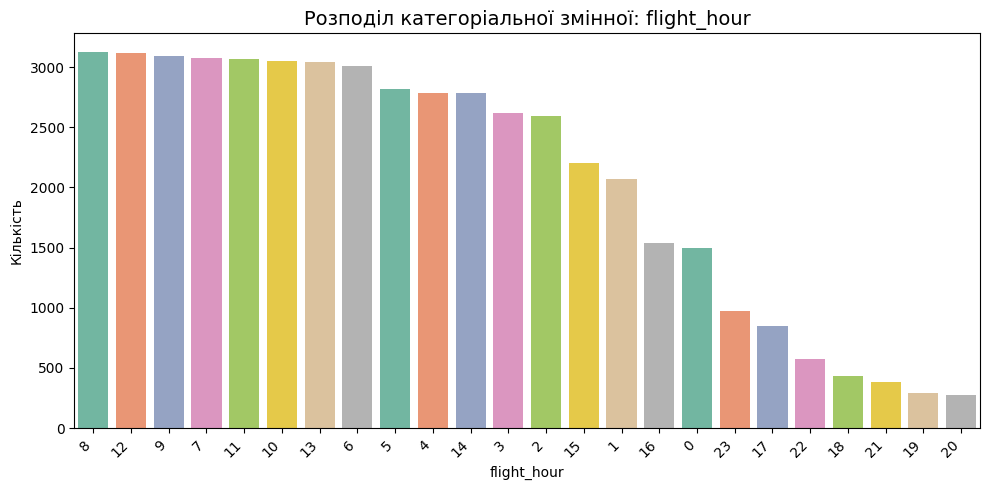

/tmp/ipython-input-411546558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=order)


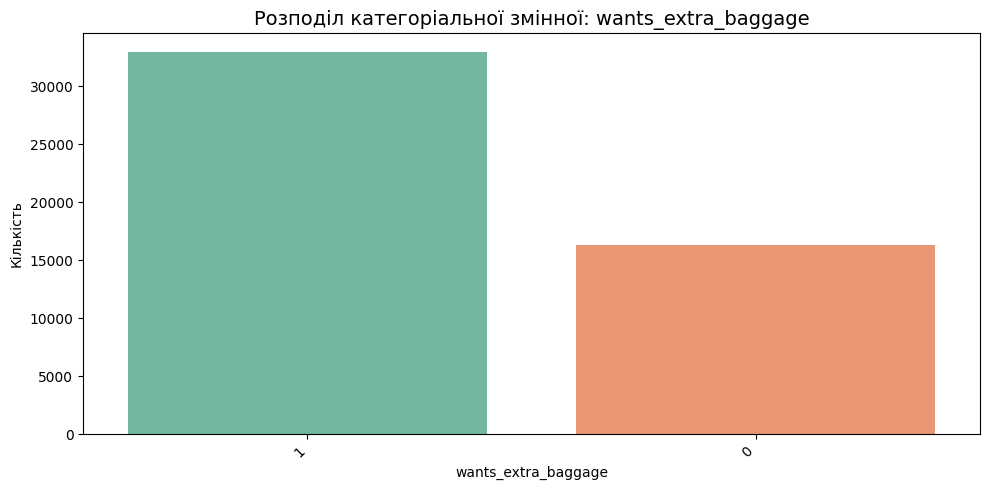

/tmp/ipython-input-411546558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=order)


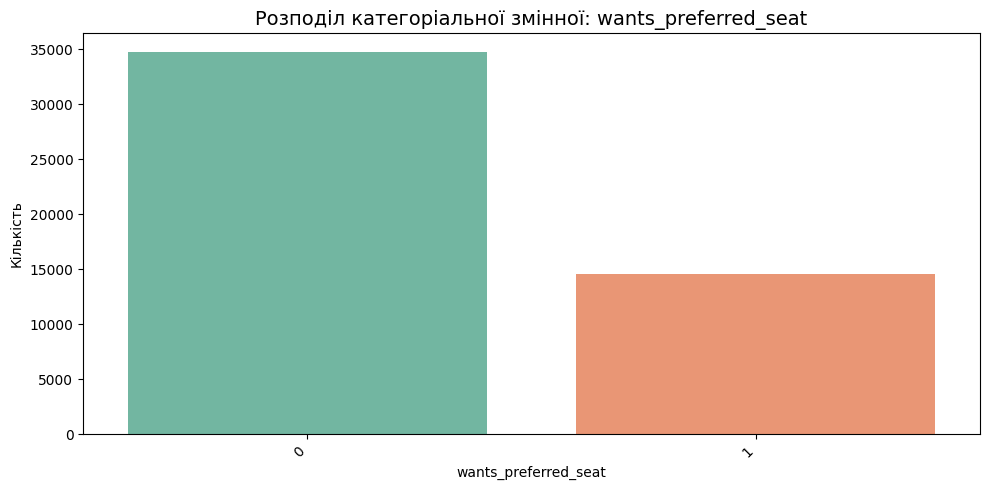

/tmp/ipython-input-411546558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=order)


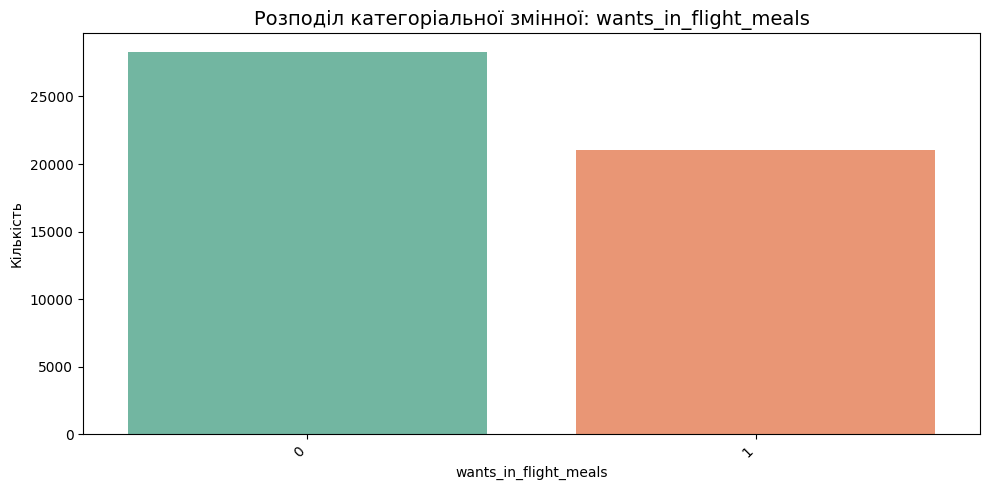

/tmp/ipython-input-411546558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=order)


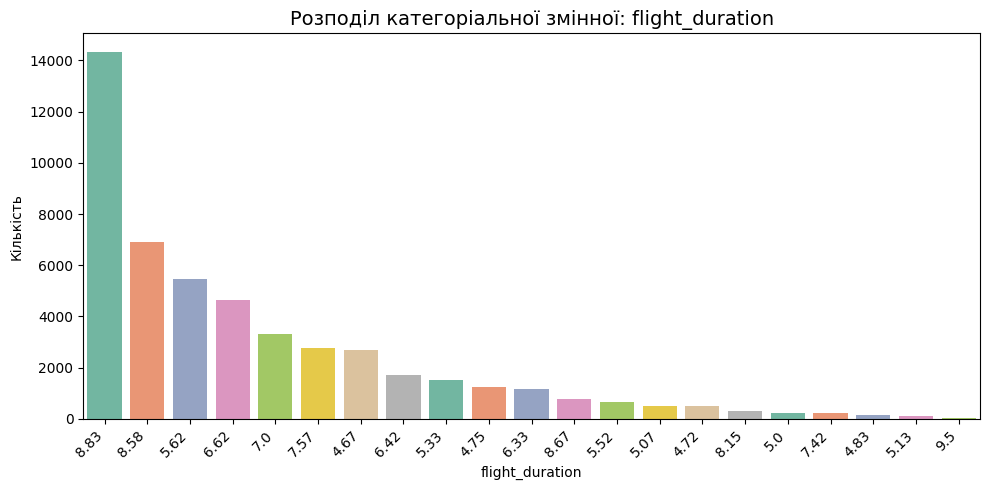

In [ ]:

cat_cols = ["num_passengers",
            "flight_hour", "wants_extra_baggage", "wants_preferred_seat",
            "wants_in_flight_meals", "flight_duration"]
for col in cat_cols:
    plt.figure(figsize=(10,5))

    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, palette="Set2", order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Розподіл категоріальної змінної: {col}", fontsize=14)
    plt.ylabel("Кількість")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-4109810642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="booking_complete", data=df, palette="viridis")


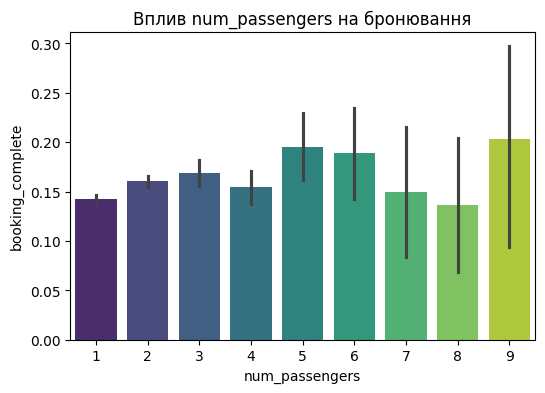

/tmp/ipython-input-4109810642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="booking_complete", data=df, palette="viridis")


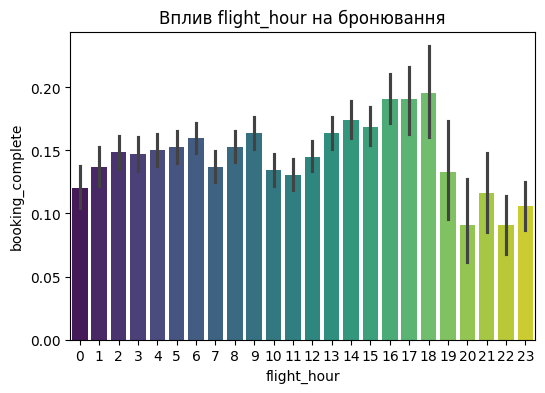

/tmp/ipython-input-4109810642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="booking_complete", data=df, palette="viridis")


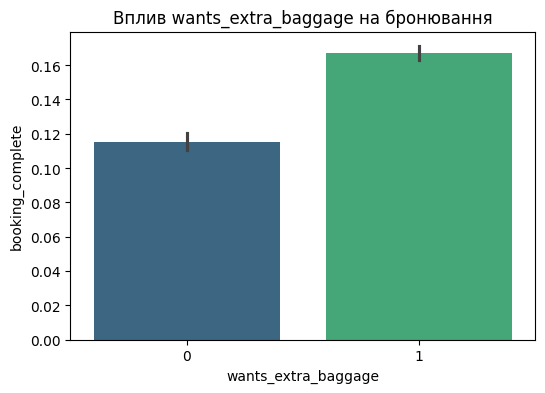

/tmp/ipython-input-4109810642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="booking_complete", data=df, palette="viridis")


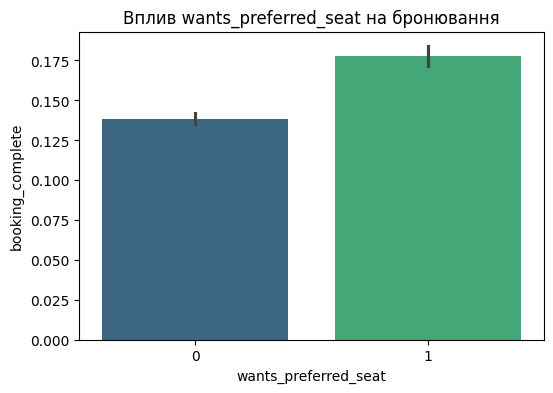

/tmp/ipython-input-4109810642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="booking_complete", data=df, palette="viridis")


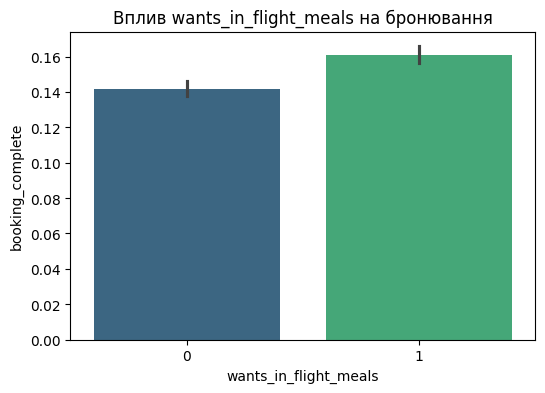

/tmp/ipython-input-4109810642.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="flight_duration_range", y="booking_complete", data=df, palette="viridis")


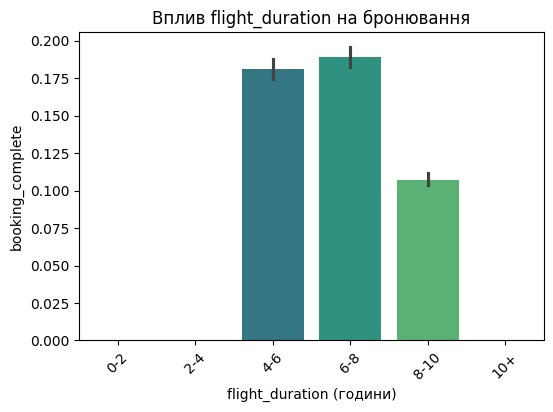

In [ ]:
for col in ["num_passengers",
            "flight_hour", "wants_extra_baggage", "wants_preferred_seat",
            "wants_in_flight_meals"]:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="booking_complete", data=df, palette="viridis")
    plt.title(f"Вплив {col} на бронювання")
    plt.show()

bins = [0, 2, 4, 6, 8, 10, 12]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df['flight_duration_range'] = pd.cut(df['flight_duration'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6, 4))
sns.barplot(x="flight_duration_range", y="booking_complete", data=df, palette="viridis")
plt.title("Вплив flight_duration на бронювання")
plt.xlabel("flight_duration (години)")
plt.xticks(rotation=45)
plt.show()


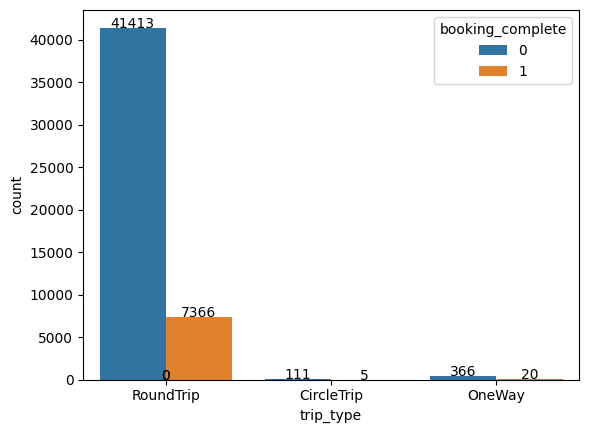

In [ ]:
ax = sns.countplot(data=dataset, x='trip_type', hue='booking_complete')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 5, f'{int(p.get_height())}', ha="center")

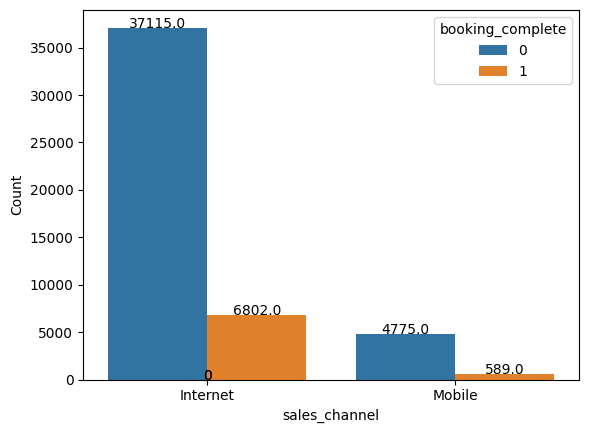

In [ ]:

ax = sns.countplot(data=dataset, x='sales_channel', hue='booking_complete')

total = len(dataset['sales_channel'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{height}',
            ha="center")

plt.ylabel('Count')
plt.show()

In [ ]:
ax = sns.countplot(data=dataset, x='wants_preferred_seat', hue='booking_complete')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 5, f'{int(p.get_height())}', ha="center")

NameError: name 'sns' is not defined

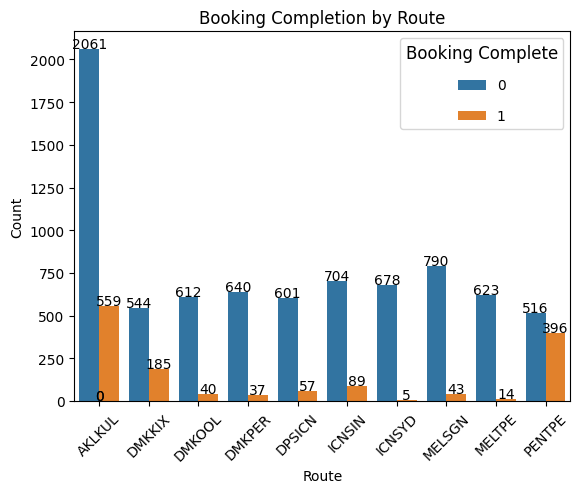

In [ ]:
top_routes = dataset['route'].value_counts().head(10).index
ax = sns.countplot(data=dataset[dataset['route'].isin(top_routes)], x='route', hue='booking_complete')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 5, f'{int(p.get_height())}', ha="center")
ax.set_title('Booking Completion by Route')
ax.set_xlabel('Route')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Booking Complete', title_fontsize=12, labelspacing=1.2)
plt.show()

Маршрут PENTPE найбільш успішний
Маршрут ICNSYD найменш успішний

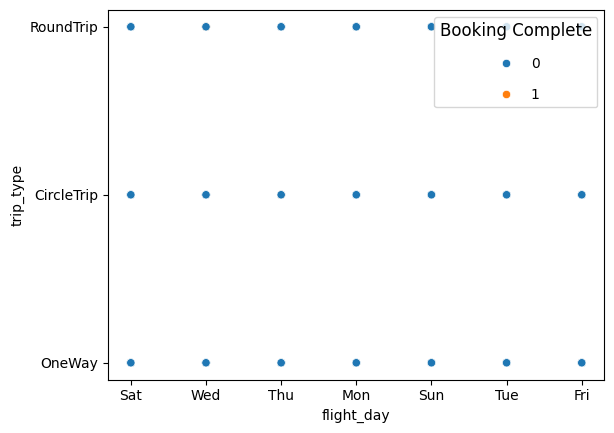

In [ ]:

ax = sns.scatterplot(data=dataset, x='flight_day', y='trip_type', hue='booking_complete')

ax.legend(title='Booking Complete', loc='upper right', title_fontsize=12, labelspacing=1.2)

ax.set_xlabel('flight_day')
ax.set_ylabel('trip_type')

plt.show()

<Axes: xlabel='purchase_lead', ylabel='booking_complete'>

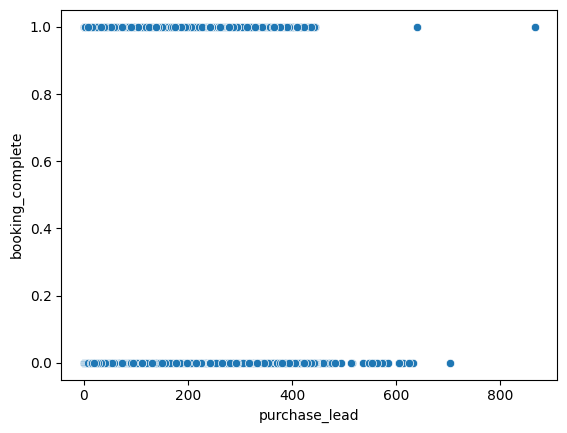

In [ ]:
sns.scatterplot(data=dataset, x='purchase_lead', y='booking_complete')

<Axes: xlabel='length_of_stay', ylabel='booking_complete'>

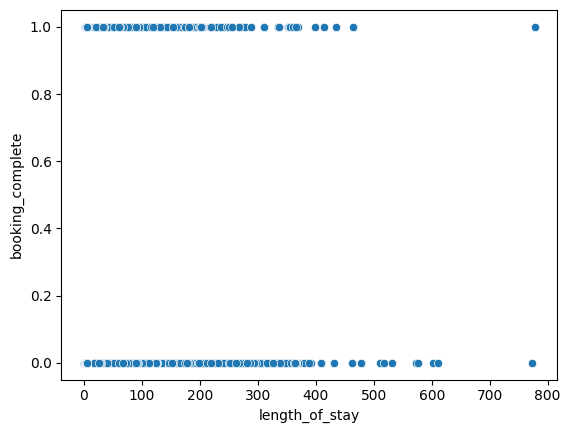

In [ ]:
sns.scatterplot(data=dataset, x='length_of_stay', y='booking_complete')

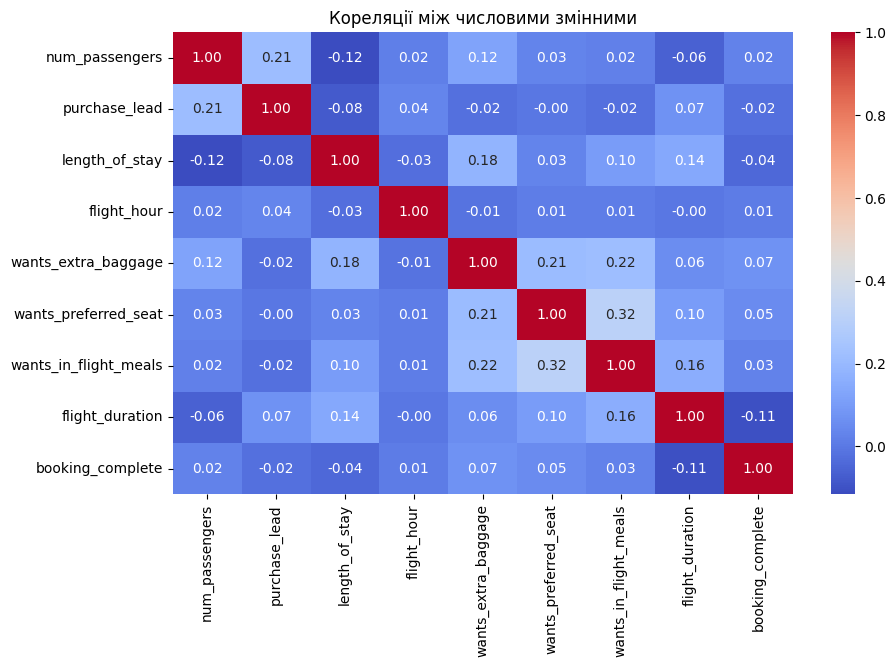

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляції між числовими змінними")
plt.show()
